In [2]:
import cv2 as cv 
from matplotlib import pyplot as plt 

import numpy as np


# Function to display an image without axis and with a specified colormap
def show_image(img, cmap=None):
    plt.axis('off')
    plt.imshow(img, cmap=cmap)
    plt.show()

# Function to calculate the Sum of Squared Differences (SSD) between two images
def ssd(image1, image2):
    # Assuming images have the same number of channels
    # If inconsistent height and width, take the minimum for each dimension
    height = min(image1.shape[0], image2.shape[0])
    width = min(image1.shape[1], image2.shape[1])
    
    # Calculate A-B, considering only the minimum dimensions of both images
    dif = (image1[0:height, 0:width].astype(float).ravel()
           - image2[0:height, 0:width].astype(float).ravel())
    
    # Return the Sum of Squared Differences (SSD) between A and B
    return np.dot(dif, dif)


/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packag

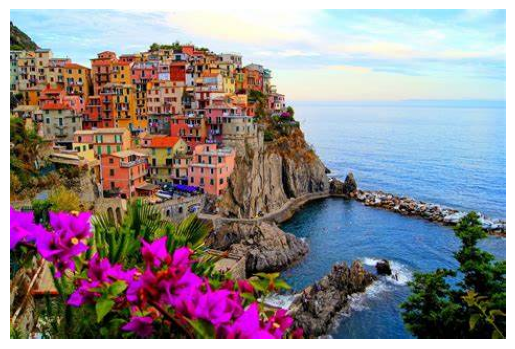

In [3]:

image_1 = cv.imread("CinqueTerre.jpg")
image_1 = cv.cvtColor(image_1, cv.COLOR_BGR2RGB)
# Display an image using the show_image function
show_image(image_1, cmap='gray')


In [4]:
# Part a
height_1, width_1, channels_1 = image_1.shape
print(f"The image CinqueTerre.jpg has :\n Height - {height_1}\n Width - {width_1}\n Channels - {channels_1}")


The image CinqueTerre.jpg has :
 Height - 315
 Width - 474
 Channels - 3


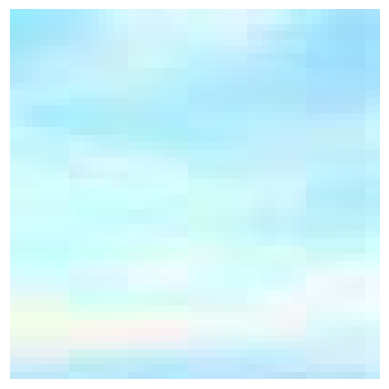

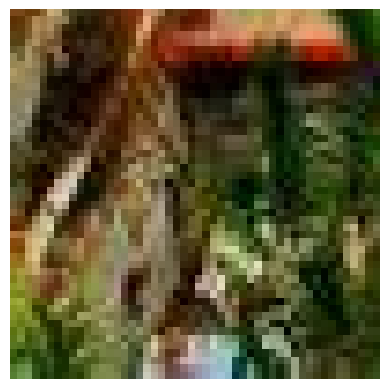

In [5]:
subimage1 = image_1[:50, -50:, :] 
subimage2 = image_1[-50:, :50, :]
show_image(subimage1)
show_image(subimage2)


In [6]:
SSD = ssd(subimage1, subimage2) 
print(f"SSD = {SSD}")

SSD = 229481386.0


In [7]:
image_2 = cv.imread("windmills.jpg", cv.IMREAD_GRAYSCALE) 

# Check if the image was loaded successfully
if image_2 is not None:
    height_2, width_2 = image_2.shape
    print(f"The image windmills.jpg has:\n Height - {height_2}\n Width - {width_2}")
else:
    print("Failed to load the image windmills.jpg")


The image windmills.jpg has:
 Height - 1024
 Width - 396


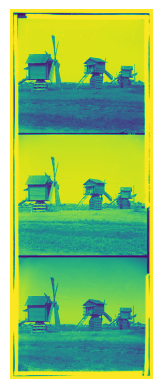

In [8]:
image_2 = cv.imread("windmills.jpg", cv.IMREAD_GRAYSCALE) 
show_image(image_2)


In [9]:
# All of them have the width from 17 to 317, the heights for each are as below
blue_chan = image_2[13:334, 17:377]
green_chan = image_2[346:681, 17:377]
red_chan = image_2[687:1010, 17:377]

# calculating the width and height as the max of each image,
# so that padding can be added
_, width = blue_chan.shape
height = max(blue_chan.shape[0], green_chan.shape[0], red_chan.shape[0])

# Defined a small function which adds an equal padding
# so that the image is centered and
# all the images are equal sized
def equal_pad(x):
    return cv.copyMakeBorder(
        x,
        (height - x.shape[0])//2,
        height - x.shape[0] - (height - x.shape[0])//2,
        (width - x.shape[1])//2,
        width - x.shape[1] - (width - x.shape[1])//2,
        cv.BORDER_CONSTANT,
        None,
        value=255
    )

# add the padding
blue_chan = equal_pad(blue_chan)
green_chan = equal_pad(green_chan)
red_chan = equal_pad(red_chan)

print(f"shape of the padded channels = {red_chan.shape}")


shape of the padded channels = (335, 360)


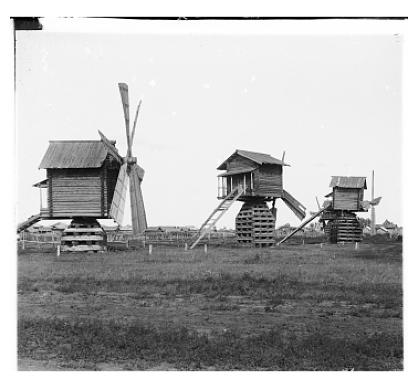

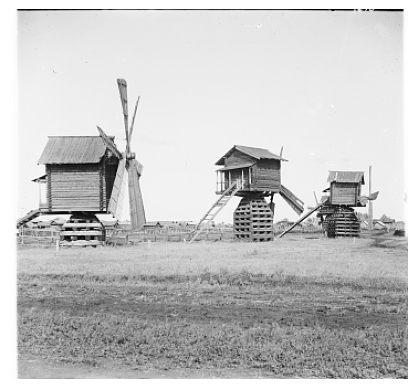

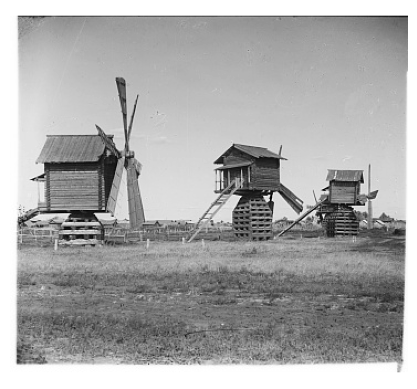

In [10]:
show_image(blue_chan, cmap='gray') 
show_image(green_chan, cmap='gray') 
show_image(red_chan, cmap='gray')

/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packag

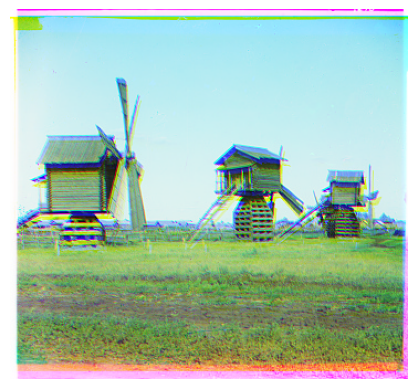

In [12]:
img_coloured = cv.merge([blue_chan, green_chan, red_chan]) 
img_coloured = cv.cvtColor(img_coloured, cv.COLOR_BGR2RGB)
show_image(img_coloured)

In [13]:
green_chan_ext = cv.copyMakeBorder(green_chan,
                                   10, 10, 10, 10,
                                   cv.BORDER_CONSTANT,
                                   None, value=225)
red_chan_ext = cv.copyMakeBorder(red_chan,
                                 10, 10, 10, 10,
                                 cv.BORDER_CONSTANT,
                                 None, value=225)


In [16]:
# align green channel
best_ssd_green = 0 
displacement_green = (0,0)
for i in range(21):
    for j in range(21):
        curr_ssd = ssd(blue_chan, green_chan_ext[i:341+i, j:391+j]) 
        if best_ssd_green == 0 or curr_ssd < best_ssd_green:
            best_ssd_green = curr_ssd 
            displacement_green = (i,j)
print(f"For Green channel:\nBest SSD - {best_ssd_green}\nDisplacement - {(displacement_green[0]-10,displacement_green[1]-10)}")


For Green channel:
Best SSD - 340369545.0
Displacement - (-5, -1)


In [17]:
# align red channel
best_ssd_red = 0
displacement_red = (0, 0)
for i in range(21):
    for j in range(21):
        curr_ssd = ssd(blue_chan, red_chan_ext[i:341+i, j:391+j])
        if best_ssd_red == 0 or curr_ssd < best_ssd_red:
            best_ssd_red = curr_ssd
            displacement_red = (i, j)
print(f"For Red channel:\nBest SSD - {best_ssd_red}\nDisplacement - {(displacement_red[0]-10, displacement_red[1]-10)}")


For Red channel:
Best SSD - 356225962.0
Displacement - (-6, -2)


In [18]:
#Merge the two chanels

image_2_merged = cv.merge([blue_chan, green_chan_ext[displacement_green[0]:height+displacement_green[0],
displacement_green[1]:width+displacement_green[1]], red_chan_ext[displacement_red[0]:height+displacement_red[0],
displacement_red[1]:width+displacement_red[1]]])

/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/praveenkumar/Library/Python/3.11/lib/python/site-packag

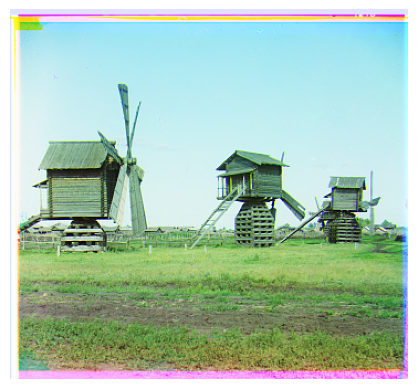

In [19]:
image_2_merged = cv.cvtColor(image_2_merged, cv.COLOR_BGR2RGB) 
show_image(image_2_merged)